<a href="https://colab.research.google.com/github/akhilesh-kanmanthreddy/Ah-nickless---Ausome-Reality/blob/codespace-akhilesh-kanmanthreddy-scaling-space-qrq495rp7vrhx7gr/Akhilesh_Kanmanthreddy_Brain_Tumor_Classification_Flint_Regional_Science_and_Engineering_Fair_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase I Tumor **Classification**

# Importing Libraries


In [ ]:
#installing API's
#!pip install tensorflow opencv-python matplotlib
#!pip list

In [ ]:
#Importing dependencies
import tensorflow as tf
import os

# Removing bad images


In [ ]:
#removing dogey images
import cv2
import imghdr
data_dir = '/content/drive/MyDrive/data ' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

#Loading Data

Found 2998 files belonging to 2 classes.


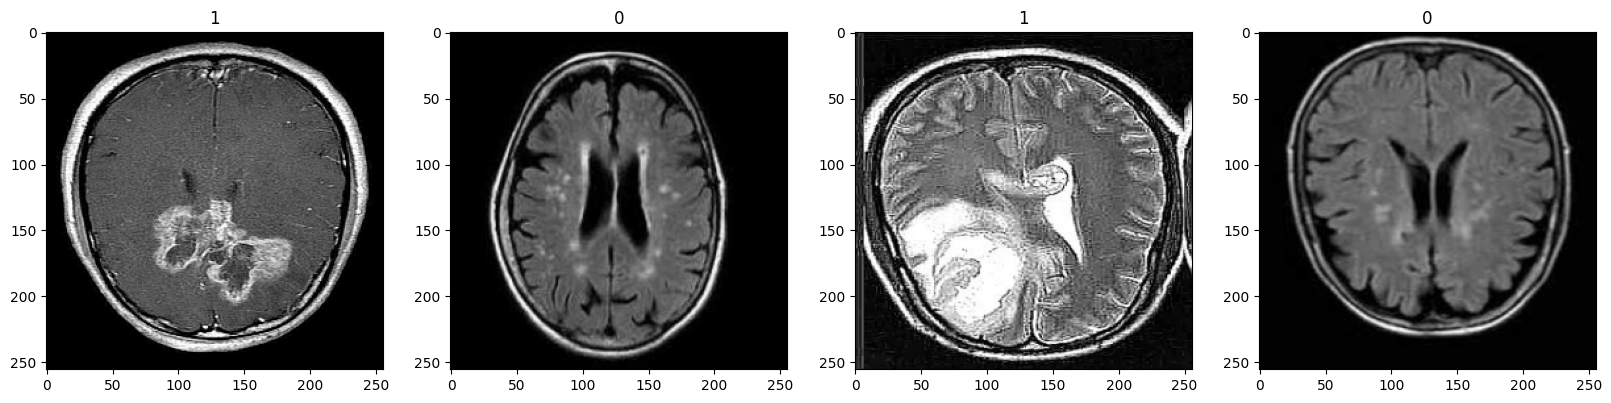

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data ')


data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# scaling data


In [ ]:
#scaling data
data = data.map(lambda x,y: (x/255, y))
scaled_iterator =data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].min()

0.0

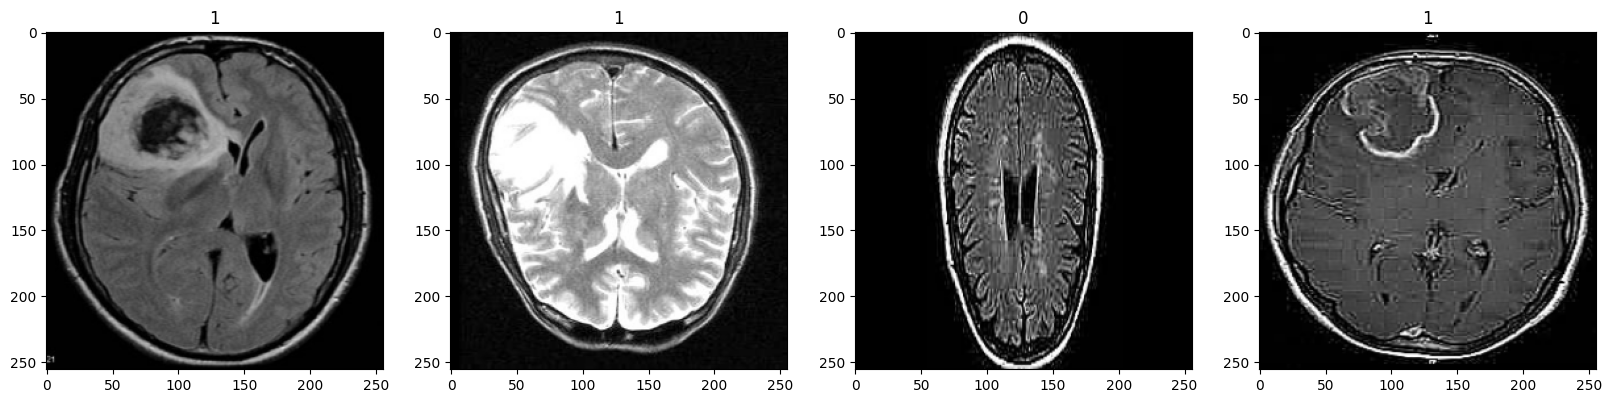

In [ ]:
#plotting data
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train_size

65

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# CREATING MODEL


In [ ]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

# Testing different filter dimensions 3X13, 4X4, 6X6, 10X10




In [ ]:
#model 1
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 2
model.add(Conv2D(16, (4,4), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 3
model.add(Conv2D(16, (6,6), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (6,6), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (6,6), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 4
model.add(Conv2D(16, (10,10), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (10,10), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (10,10), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Testing different activation functions RELU, SELU, GELU, TANH, Swish, Linear



In [ ]:
#model 1
model.add(Conv2D(16, (4,4), 1, activation='gelu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='gelu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='gelu'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='gelu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 2
model.add(Conv2D(16, (4,4), 1, activation='tanh', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 3
model.add(Conv2D(16, (4,4), 1, activation='selu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='selu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='selu'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='selu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 4
model.add(Conv2D(16, (4,4), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Testing convolutional layer filter patterns 


In [ ]:
#model 1
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 2
model.add(Conv2D(32, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model 3
model.add(Conv2D(16, (3,3), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Testing different optimizers


In [ ]:
#model 1
model.add(Conv2D(16, (4,4), 1, activation='linear', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='linear'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('adagrad', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('Ftrl', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('Nadam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.compile('adamax', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#Best model 
model.add(Conv2D(16, (4,4), 1, activation='tanh', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (4,4), 1, activation='tanh'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 123, 123, 32)      8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 58, 58, 16)        8208      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 16)       0

# Training


In [ ]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
65/65 [==============================] - 16s 241ms/step - loss: 0.1546 - accuracy: 0.9481 - val_loss: 0.1155 - val_accuracy: 0.9670
Epoch 2/10
65/65 [==============================] - 13s 191ms/step - loss: 0.0945 - accuracy: 0.9726 - val_loss: 0.0848 - val_accuracy: 0.9792
Epoch 3/10
65/65 [==============================] - 16s 241ms/step - loss: 0.0510 - accuracy: 0.9870 - val_loss: 0.0952 - val_accuracy: 0.9705
Epoch 4/10
65/65 [==============================] - 13s 189ms/step - loss: 0.0237 - accuracy: 0.9962 - val_loss: 0.0525 - val_accuracy: 0.9826
Epoch 5/10
65/65 [==============================] - 13s 187ms/step - loss: 0.0119 - accuracy: 0.9990 - val_loss: 0.0585 - val_accuracy: 0.9861
Epoch 6/10
65/65 [==============================] - 16s 241ms/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.0775 - val_accuracy: 0.9774
Epoch 7/10
65/65 [==============================] - 13s 188ms/step - loss: 0.0053 - accuracy: 0.9995 - val_loss: 0.0522 - val_accuracy: 0.9844

# graphing preformance


In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#metrics

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())


1/1 [==============================] - 0s 29ms/step
tf.Tensor(0.986014, shape=(), dtype=float32) tf.Tensor(0.9591837, shape=(), dtype=float32) tf.Tensor(0.9722222, shape=(), dtype=float32)


# Testing on images

In [ ]:
import cv2

<function matplotlib.pyplot.show(close=None, block=None)>

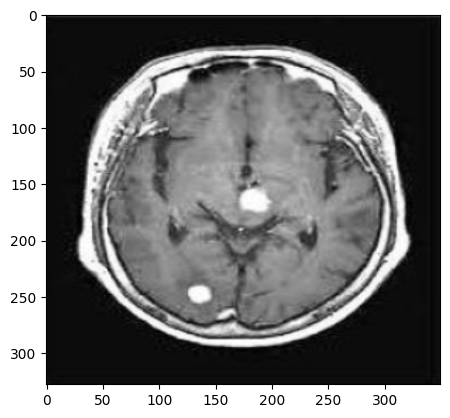

In [ ]:
#/content/drive/MyDrive/data /yes/ynumber.jpg
#/content/drive/MyDrive/data /no/nnumber.jpg
img = cv2.imread("/content/drive/MyDrive/Screenshot 2023-03-30 112611.png")
plt.imshow(img)
plt.show

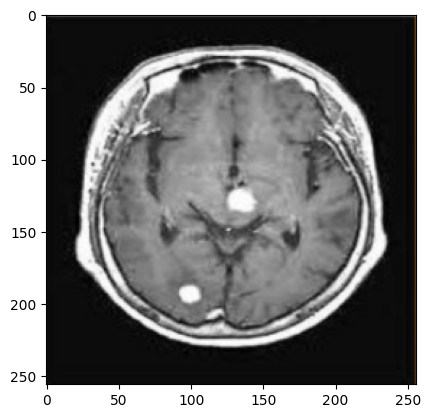

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
print(yhat)

[[0.0002919]]


In [ ]:
#write if statments here to for prediction


# Saving the model


In [ ]:
from tensorflow.keras.models import load_model
import os

In [ ]:
model.save(os.path.join("train","braintumorclassification.h5"))

In [ ]:
new_model = load_model(os.path.join("train","braintumorclassification.h5"))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: ignored

# Real Time


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


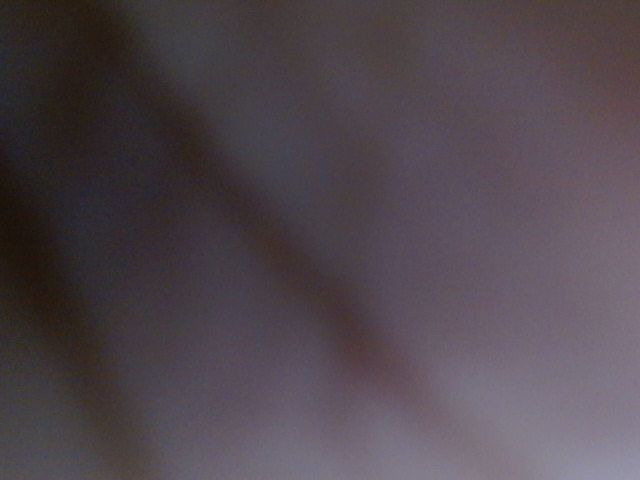

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
photo = cv2.imread("/content/photo.jpg") 
photo1 = tf.image.resize(img, (256,256))

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join("train","braintumorclassification.h5"))
new_model.predict(np.expand_dims(photo1/255, 0))

1/1 [==============================] - 0s 101ms/step


array([[0.36590502]], dtype=float32)